# PU learning techniques applied to artificial data

## "Moons" data set

In [1]:
import pandas as pd                    # for data handling
import numpy as np                     # for random selections, mainly
import matplotlib.pyplot as plt        # for plotting
%matplotlib inline                  
plt.rcParams['figure.figsize'] = 10,7   # graph dimensions
plt.rcParams['font.size'] = 14         # graph font size

In [65]:
# Create the data set
from sklearn.datasets import make_circles
n = 10000
X, y = make_circles(
    n_samples = n, noise = 0.2, 
    shuffle = True, factor = 0.6
)
X = pd.DataFrame(X, columns = ['feature1', 'feature2'])
y = pd.Series(y)
y_orig = y.copy()

X = pd.DataFrame(X, columns = ['feature1', 'feature2'])
y = pd.Series(y)

In [31]:
from sklearn.datasets import make_moons
n = 10000
X, y = make_moons(
    n_samples = n, noise = 0.25, shuffle = True)
X = pd.DataFrame(X, columns = ['feature1', 'feature2'])
y = pd.Series(y)
y_orig = y.copy()

X = pd.DataFrame(X, columns = ['feature1', 'feature2'])
y = pd.Series(y)

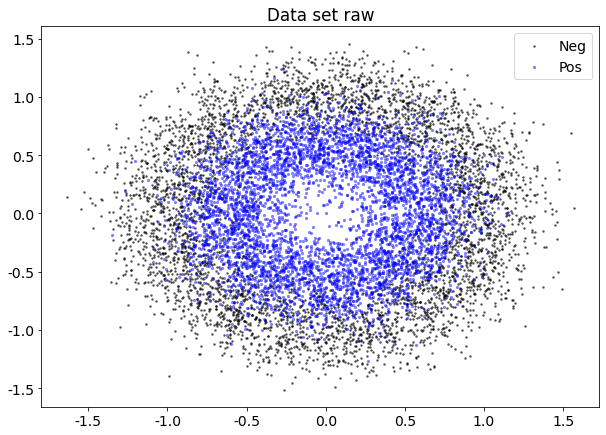

In [48]:
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c='k', marker='.', linewidth=1, s=10, alpha=0.5,
    label='Neg'
)


plt.scatter(
    X[y==1].feature1, X[y==1].feature2, 
    c='b', marker='o', linewidth=0, s=10, alpha=0.5, 
    label='Pos'
)

plt.legend()
plt.title('Data set raw')
plt.show()

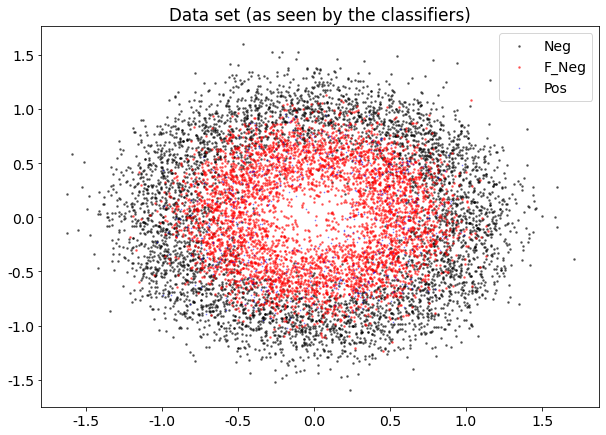

In [32]:
# Plot the data set, as the models will see it
plt.scatter(
    X[y_relabel==0].feature1, X[y_relabel==0].feature2, 
    c='k', marker='.', linewidth=1, s=10, alpha=0.5, 
    label='Neg'
)
plt.scatter(
    X[y_relabel==2].feature1, X[y_relabel==2].feature2, 
    c='r', marker='.', linewidth=1, s=10, alpha=0.5, 
    label='F_Neg'
)
plt.scatter(
    X[y_relabel==1].feature1, X[y_relabel==1].feature2, 
    c='b', marker='.', linewidth=0, s=10, alpha=0.5, 
    label='Pos'
)
plt.legend()
plt.title('Data set (as seen by the classifiers)')
plt.show()

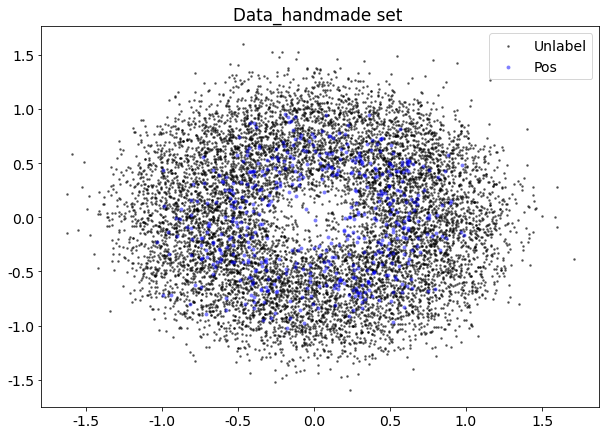

In [33]:
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c='k', marker='.', linewidth=1, s=10, alpha=0.5, 
    label='Unlabel'
)

plt.scatter(
    X[y==1].feature1, X[y==1].feature2, 
    c='b', marker='o', linewidth=0, s=15, alpha=0.5, 
    label='Pos'
)
plt.legend()
plt.title('Data_handmade set ')
plt.show()

## Standard classifier

In [66]:
# We'll use a generic random forest
# 随机森林
from sklearn.ensemble import RandomForestClassifier
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=22)
rf = RandomForestClassifier(
    n_estimators = 1000,  # Use 1000 trees
    n_jobs = -1           # Use all CPU cores
)
rf.fit(x_train, y_train)

# Store the scores assigned by this approach
results = pd.DataFrame({
    'label'      : y,# The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores
}, columns = [ 'label', 'output_std'])
results

,label,output_std
0,1,0.856
1,1,0.999
2,1,0.998
3,1,0.996
4,0,0.121
...,...,...
9995,1,0.698
9996,0,0.008
9997,1,0.996
9998,1,0.698


In [42]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [43]:
from sklearn.model_selection import train_test_split
def xgb_train(data_x,data_y,lr=0.05,max_depth=7,n_trees=200):
    x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.25, random_state=22)
    eval_set = [(x_valid,y_valid)]
    model = XGBClassifier(learning_rate=lr, max_depth=max_depth,n_estimators=n_trees, objective = 'binary:logistic',eval_metric = 'auc',random_state = 123)
    model.fit(x_train, y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=True)
    return model
xgb = xgb_train(X,y,lr=0.05,max_depth=7,n_trees=200)
results['output_xgb']=xgb.predict_proba(X)[:,1]

[0]	validation_0-auc:0.98217
[1]	validation_0-auc:0.98643
[2]	validation_0-auc:0.98673
[3]	validation_0-auc:0.98896
[4]	validation_0-auc:0.98911
[5]	validation_0-auc:0.98907
[6]	validation_0-auc:0.99131
[7]	validation_0-auc:0.99126
[8]	validation_0-auc:0.99120
[9]	validation_0-auc:0.99156
[10]	validation_0-auc:0.99126
[11]	validation_0-auc:0.99132
[12]	validation_0-auc:0.99135
[13]	validation_0-auc:0.99150
[14]	validation_0-auc:0.99181
[15]	validation_0-auc:0.99259
[16]	validation_0-auc:0.99262
[17]	validation_0-auc:0.99278
[18]	validation_0-auc:0.99286
[19]	validation_0-auc:0.99287
[20]	validation_0-auc:0.99294
[21]	validation_0-auc:0.99297
[22]	validation_0-auc:0.99343
[23]	validation_0-auc:0.99334
[24]	validation_0-auc:0.99374
[25]	validation_0-auc:0.99399
[26]	validation_0-auc:0.99397
[27]	validation_0-auc:0.99403
[28]	validation_0-auc:0.99406
[29]	validation_0-auc:0.99404
[30]	validation_0-auc:0.99408
[31]	validation_0-auc:0.99440
[32]	validation_0-auc:0.99457
[33]	validation_0-au

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[39]	validation_0-auc:0.99481
[40]	validation_0-auc:0.99485
[41]	validation_0-auc:0.99503
[42]	validation_0-auc:0.99507
[43]	validation_0-auc:0.99523
[44]	validation_0-auc:0.99520
[45]	validation_0-auc:0.99539
[46]	validation_0-auc:0.99546
[47]	validation_0-auc:0.99547
[48]	validation_0-auc:0.99550
[49]	validation_0-auc:0.99547
[50]	validation_0-auc:0.99550
[51]	validation_0-auc:0.99555
[52]	validation_0-auc:0.99579
[53]	validation_0-auc:0.99581
[54]	validation_0-auc:0.99578
[55]	validation_0-auc:0.99585
[56]	validation_0-auc:0.99591
[57]	validation_0-auc:0.99594
[58]	validation_0-auc:0.99589
[59]	validation_0-auc:0.99591
[60]	validation_0-auc:0.99595
[61]	validation_0-auc:0.99607
[62]	validation_0-auc:0.99605
[63]	validation_0-auc:0.99612
[64]	validation_0-auc:0.99618
[65]	validation_0-auc:0.99618
[66]	validation_0-auc:0.99619
[67]	validation_0-auc:0.99623
[68]	validation_0-auc:0.99623
[69]	validation_0-auc:0.99624
[70]	validation_0-auc:0.99621
[71]	validation_0-auc:0.99623
[72]	valid

In [44]:
from sklearn.svm import SVC

svc =SVC(kernel='rbf', degree=4)
svc.fit(X,y)
# results['out_std_svc'] = xgb.predict_proba(X)[:,1]

SVC(degree=4)

In [37]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [38]:
# 0.25噪音
print(roc_auc_score(y_valid,rf.predict_proba(x_valid)[:,1]))
print(roc_auc_score(y_valid,xgb.predict_proba(x_valid)[:,1]))
print(roc_auc_score(y_valid,svc.predict(x_valid)))

0.98011104
0.98429824
0.9456000000000001


/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [45]:
# circles-0.2噪音
print(roc_auc_score(y_valid,rf.predict_proba(x_valid)[:,1]))
print(roc_auc_score(y_valid,xgb.predict_proba(x_valid)[:,1]))
print(roc_auc_score(y_valid,svc.predict(x_valid)))
# print(roc_auc_score(y,rf.predict_proba(X)[:,1]))

0.9950779463835386
0.9963577443297174
0.9796250022402064


/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_valid,rf.predict(x_valid),digits=4))
print(classification_report(y_valid,xgb.predict(x_valid),digits=4))
print(classification_report(y_valid,svc.predict(x_valid),digits=4))

              precision    recall  f1-score   support

           0     0.9793    0.9770    0.9782      1262
           1     0.9766    0.9790    0.9778      1238

    accuracy                         0.9780      2500
   macro avg     0.9780    0.9780    0.9780      2500
weighted avg     0.9780    0.9780    0.9780      2500

              precision    recall  f1-score   support

           0     0.9808    0.9731    0.9769      1262
           1     0.9728    0.9806    0.9767      1238

    accuracy                         0.9768      2500
   macro avg     0.9768    0.9768    0.9768      2500
weighted avg     0.9768    0.9768    0.9768      2500

              precision    recall  f1-score   support

           0     0.9825    0.9770    0.9797      1262
           1     0.9767    0.9822    0.9795      1238

    accuracy                         0.9796      2500
   macro avg     0.9796    0.9796    0.9796      2500
weighted avg     0.9796    0.9796    0.9796      2500



/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [84]:
print(roc_auc_score(y_orig,xgb.predict_proba(X)[:,1]))

0.9401130200000001


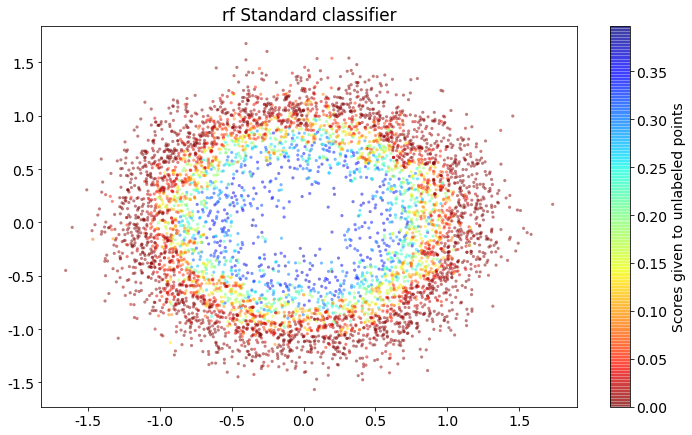

In [18]:
# 可视化未标注
plt.rcParams['figure.figsize'] = 12,7
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c = results[y==0].output_std, linewidth = 0, s = 10, alpha = 0.5, 
    cmap = 'jet_r'
)
plt.colorbar(label='Scores given to unlabeled points')
plt.title('rf Standard classifier')
plt.show()

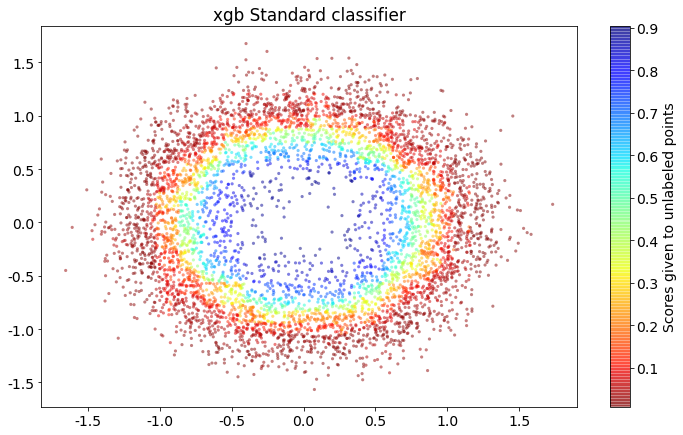

In [19]:
# 可视化未标注
plt.rcParams['figure.figsize'] = 12,7
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c = results[y==0].output_xgb, linewidth = 0, s = 10, alpha = 0.5, 
    cmap = 'jet_r'
)
plt.colorbar(label='Scores given to unlabeled points')
plt.title('xgb Standard classifier')
plt.show()

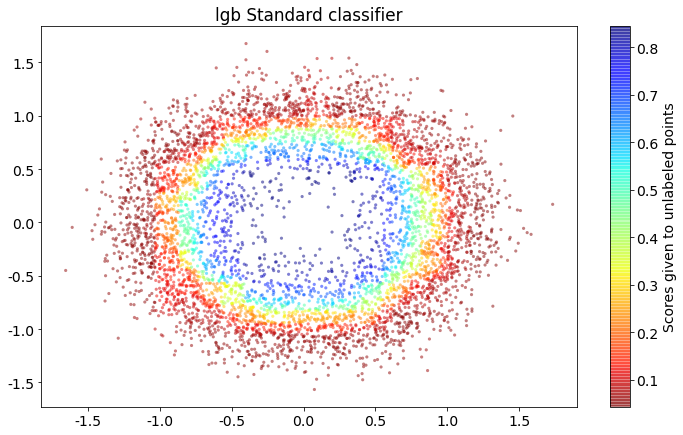

In [20]:
# 可视化未标注
plt.rcParams['figure.figsize'] = 12,7
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c = results[y==0].output_lgb, linewidth = 0, s = 10, alpha = 0.5, 
    cmap = 'jet_r'
)
plt.colorbar(label='Scores given to unlabeled points')
plt.title('lgb Standard classifier')
plt.show()

### Using `BaggingClassifierPU`

In [54]:
len(y_train)-sum(y_train)

3738

In [69]:
from baggingPU import BaggingClassifierPU
bc = BaggingClassifierPU(
    XGBClassifier(learning_rate=0.05, max_depth=7,n_estimators=50, objective = 'binary:logistic',eval_metric = 'auc',random_state = 123), 
    n_estimators = 50,  # 1000 trees as usual
    max_samples = 1000, # Balance the positives and unlabeled in each bag
    n_jobs = -1           # Use all cores
)
bc.fit(x_train, y_train)
#results['output_skb'] = bc.oob_decision_function_[:,1]
#results['output_skb'] = results['output_skb'].fillna(1)

BaggingClassifierPU(base_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 eval_metric='auc', gamma=None,
                                                 gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_delta_step=None,
                                                 max_depth=7,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None

In [63]:
len(bc.predict_proba(x_valid)[:,1])

2500

Text(0.5, 1.0, 'bagging distribution')

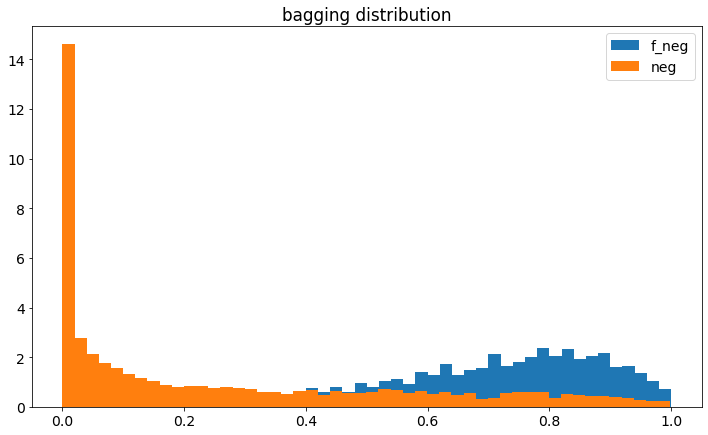

In [150]:
output = 'output_skb'
plt.hist(result[result['relabel']==2]['{}'.format(output)],bins=50,density=True,label='f_neg')
plt.hist(result[result['relabel']==0]['{}'.format(output)],bins=50,density=True,label='neg')
plt.legend()
#plt.hist(result[result['relabel']==1].output_skb,bins=50,density=True)
plt.title('bagging distribution')

In [70]:
# 0.91778
print(roc_auc_score(y_valid,bc.predict_proba(x_valid)[:,1]))

0.9170268656257862


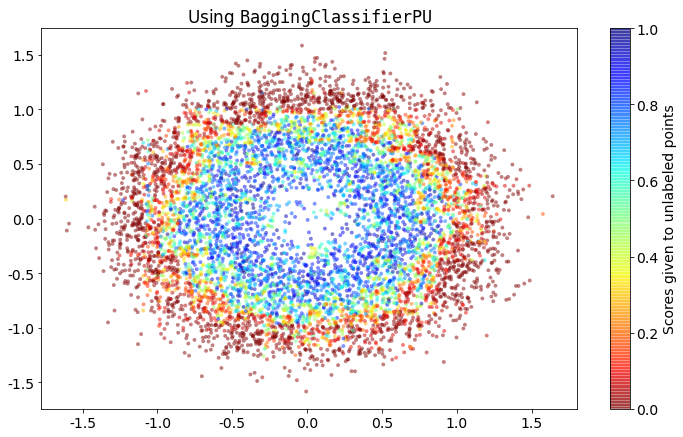

In [152]:
# Visualize this approach's results
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c = result[y==0].output_skb, linewidth = 0, s = 15, alpha = 0.5, 
    cmap = 'jet_r'
)
plt.colorbar(label='Scores given to unlabeled points')
plt.title(r'Using ${\tt BaggingClassifierPU}$')
plt.show()

## Two-step

0.0263130443022075
9500


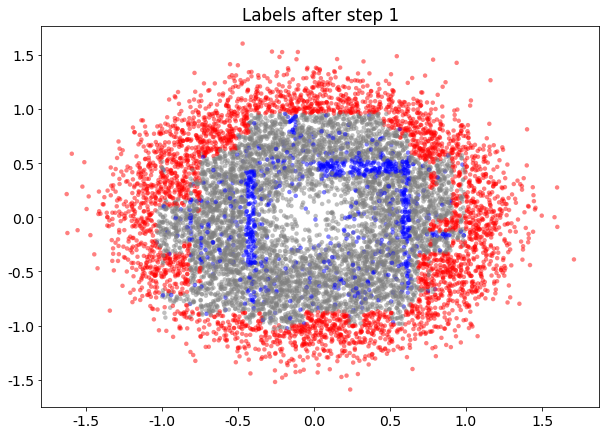

------------epoch1--------------------
Step 1 labeled 475 new positives and 3395 new negatives.
Doing step 2... [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
负样本选择上限:0.01586734730206514
未标注数据长度:5630
------------epoch2--------------------
Step 1 labeled 281 new positives and 11 new negatives.
Doing step 2... [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
负样本选择上限:0.022063281556958688
未标注数据长度:5338
------------epoch3--------------------
Step 1 labeled 266 new positives and 3 new negatives.
Doing step 2... [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
负样本选择上限:0.019903165133169615
未标注数据长度:5069
------------epoch4--------------------
Step 1 labeled 253 new positives and 16 new negatives.
Doing step 2... [LightGBM] [Warning] Accuracy may be bad sin

负样本选择上限:0.022230691511726075
未标注数据长度:1447
------------epoch31--------------------
Step 1 labeled 76 new positives and 0 new negatives.
Doing step 2... [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
负样本选择上限:0.022230691511726075
未标注数据长度:1447
------------epoch32--------------------
Step 1 labeled 76 new positives and 0 new negatives.
Doing step 2... [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
负样本选择上限:0.022230691511726075
未标注数据长度:1447
------------epoch33--------------------
Step 1 labeled 76 new positives and 0 new negatives.
Doing step 2... [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
负样本选择上限:0.022230691511726075
未标注数据长度:1447
------------epoch34--------------------
Step 1 labeled 76 new positives and 0 new negatives.
Doing step 2... [Light

In [39]:
# Create a new target vector, with 1 for positive, -1 for unlabeled, and 
# 0 for "reliable negative" (there are no reliable negatives to start with)
results_step =results.copy()
ys = 2 * y - 1

# Get the scores from before
pred = lgb.predict_proba(X)[:,1]
results_step['ys'] = ys
results_step['pred'] = pred 

# 找到正样本的取值范围
# thre
min_value = min(results_step[results_step['ys']>0]['pred'])
print(min_value)
# 未标注数据长度
l = len(results_step[results_step['ys']<0])
print(l)
i_threhold = int(l*0.05)
# 选取未标注数据中分值前5%作为new_pos
df = results_step[results_step['ys']<0].sort_values('pred')


# STEP 1
# If any unlabeled point has a score above all known positives, 
# or below all known positives, label it accordingly
iP_new = df.iloc[-i_threhold:,4].index
# print(iP_new )
iN_new = results_step[(results_step['ys']<0)&(results_step['pred']<min_value)].index
# print(iN_new )
ys.loc[iP_new] = 1
ys.loc[iN_new] = 0
results_step['ys'] = ys

# Show the results of step 1
plt.rcParams['figure.figsize'] = 10,7
cdict = {-1:'gray', 0:'red', 1:'blue'}
plt.scatter(
    X.feature1, X.feature2, 
    c = [cdict[k] for k in ys], 
    linewidth = 0, s = 20, alpha = 0.5
)
plt.title('Labels after step 1')
plt.show()   


# Classifier to be used for step 2
lgb2 = LGBMClassifier(learning_rate=0.05,max_depth=7,n_estimators = 50)
auc = []
auc.append(roc_auc_score(y_orig,pred))
max_ = auc[0]
max_i = 1


# Limit to 10 iterations (this is arbitrary, but 
for i in range(50):
    # If step 1 didn't find new labels, we're done
    print('------------epoch{}--------------------'.format(i+1))
    if len(iP_new) + len(iN_new) == 0 and i > 0:
        break
        
    print(
        'Step 1 labeled %d new positives and %d new negatives.' 
        % (len(iP_new), len(iN_new))
    )
    print('Doing step 2... ', end = '')

    # STEP 2
    # Retrain on new labels and get new scores
    lgb2.fit(X, ys)
    pred = lgb2.predict_proba(X)[:,-1]
    results_step['pred'] = pred
    auc.append(roc_auc_score(y_orig,pred))
    if roc_auc_score(y_orig,pred)>max_:
        max_ = roc_auc_score(y_orig,pred)
        max_i = i+1

    # Find the range of scores given to positive data points
    min_value = min(results_step[results_step['ys']>0]['pred'])
    print('负样本选择上限:{}'.format(min_value))
    # 未标注数据长度
    l = len(results_step[results_step['ys']<0])
    print('未标注数据长度:{}'.format(l))
    if len(ys[ys==1])<5000:
        i_threhold = int(l*0.05)
        # 选取未标注数据中分值前5%作为new_pos
        df = results_step[results_step['ys']<0].sort_values('pred')
        # Repeat step 1
        iP_new = df.iloc[-i_threhold:,4].index
        ys.loc[iP_new] = 1
    iN_new = results_step[(results_step['ys']<0)&(results_step['pred']<min_value)].index
    # ys.loc[iP_new] = 1
    ys.loc[iN_new] = 0
    results_step['ys'] = ys
    
# Lastly, get the scores assigned by this approach    
results_stb = pd.DataFrame({
    'truth'      : y_orig,   # The true labels
    'relabel'    : y_relabel,
    'label'      : y,      # The labels to be shown to models in experiment
    'output_stb' : pred
}, columns = ['truth', 'label', 'relabel', 'output_stb'])


In [205]:
print(len(ys[ys==0]),len(ys[ys==1]))

3912 4733


In [40]:
max_

0.8832355599999999

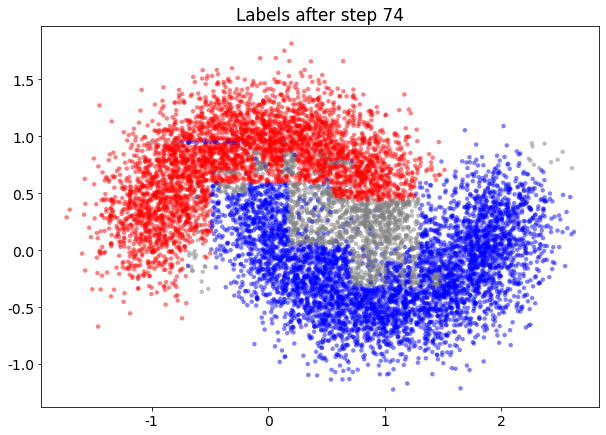

In [208]:
plt.rcParams['figure.figsize'] = 10,7
cdict = {-1:'gray', 0:'red', 1:'blue'}
plt.scatter(
    X.feature1, X.feature2, 
    c = [cdict[k] for k in ys], 
    linewidth = 0, s = 20, alpha = 0.5
)
plt.title('Labels after step 74')
plt.show()   

In [210]:
print(roc_auc_score(y_orig,results_stb['output_stb']))

0.9750028799999999


In [ ]:
from joblib import dump,load
dump(lgb2,'lgb.joblib')


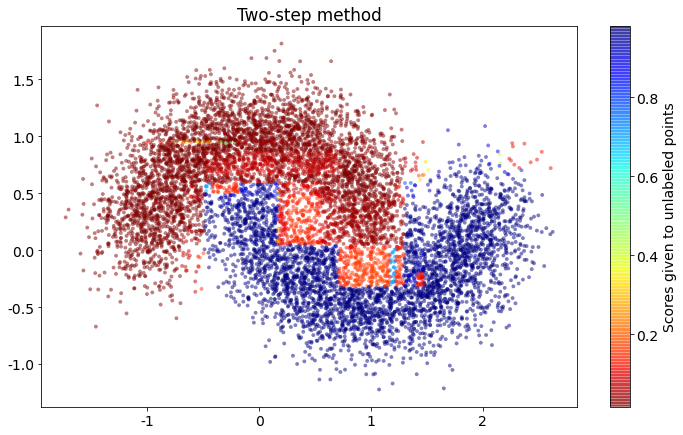

In [209]:
# Visualize this approach's final results
plt.rcParams['figure.figsize'] = 12,7
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c = results_stb[y==0].output_stb, linewidth = 0, s = 15, alpha = 0.5, 
    cmap = 'jet_r'
)
plt.colorbar(label='Scores given to unlabeled points')
plt.title('Two-step method')
plt.show()

Text(0.5, 1.0, 'two_steps distribution')

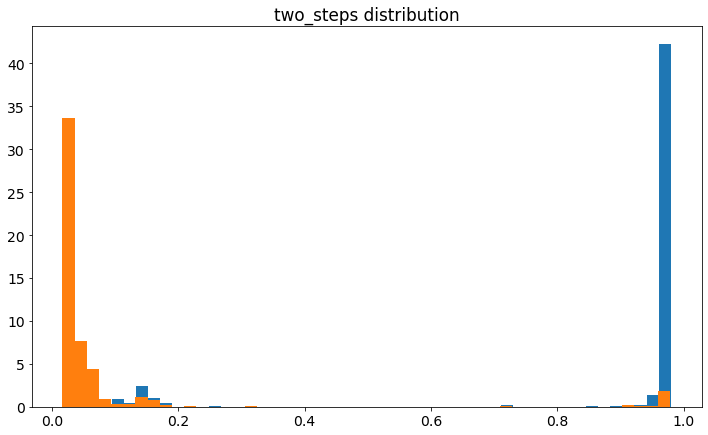

In [215]:
result = results_stb
plt.hist(result[result['relabel']==2].output_stb,bins=50,density=True)
plt.hist(result[result['relabel']==0].output_stb,bins=50,density=True)
#plt.hist(result[result['relabel']==1].output_stb,bins=50,density=True)
plt.title('two_steps distribution')

## Comparison of approaches

In [15]:
# For each data point, calculate the average score from the three approaches
results['output_all'] = results[[
    'output_std', 'output_bag', 'output_stp'
]].mean(axis = 1)

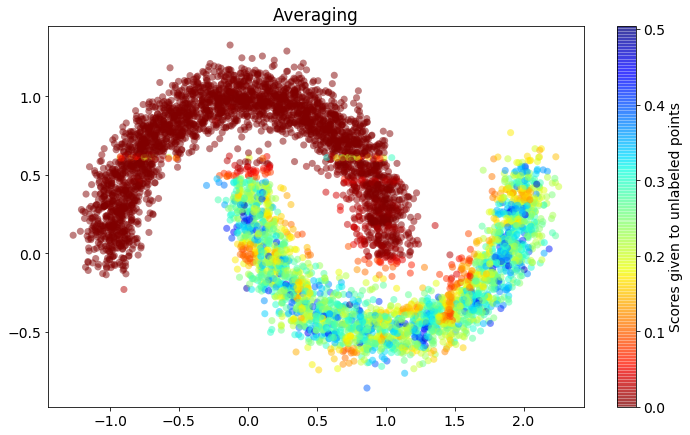

In [16]:
# Visualize average scores
plt.rcParams['figure.figsize'] = 12,7
plt.scatter(
    X[y==0].feature1, X[y==0].feature2, 
    c = results[y==0].output_all, linewidth = 0, s = 50, alpha = 0.5, 
    cmap = 'jet_r'
)
plt.colorbar(label='Scores given to unlabeled points')
plt.title('Averaging')
plt.show()

In [17]:
# Prepare for graphing the performance 
# (i.e. the success in identifying hidden positives)
ts = range(100, hidden_size, 100)
y_std, y_bag, y_skb, y_stp, y_all = [], [], [], [], []
for t in ts:
    y_std.append(
        results[results.label == 0].sort_values(
            'output_std', ascending = False
        ).head(t).truth.mean()
    )
    y_bag.append(
        results[results.label == 0].sort_values(
            'output_bag', ascending = False
        ).head(t).truth.mean()
    )
    y_skb.append(
        results[results.label == 0].sort_values(
            'output_skb', ascending = False
        ).head(t).truth.mean()
    )
    y_stp.append(
        results[results.label == 0].sort_values(
            'output_stp', ascending = False
        ).head(t).truth.mean()
    )
    y_all.append(
        results[results.label == 0].sort_values(
            'output_all', ascending = False
        ).head(t).truth.mean()
    )
    

In [18]:
# Check the difference between PU bagging the 
# long way and using BaggingClassifierPU
[y_bag[i] - y_skb[i] for i in range(len(y_bag))]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0006666666666665932,
 -0.0006249999999999867,
 0.0005882352941175562,
 0.0011111111111110628,
 0.0015789473684210131,
 -0.0010000000000000009,
 0.0,
 0.0,
 -0.00043478260869567187,
 0.0,
 0.0,
 -0.00038461538461531664]

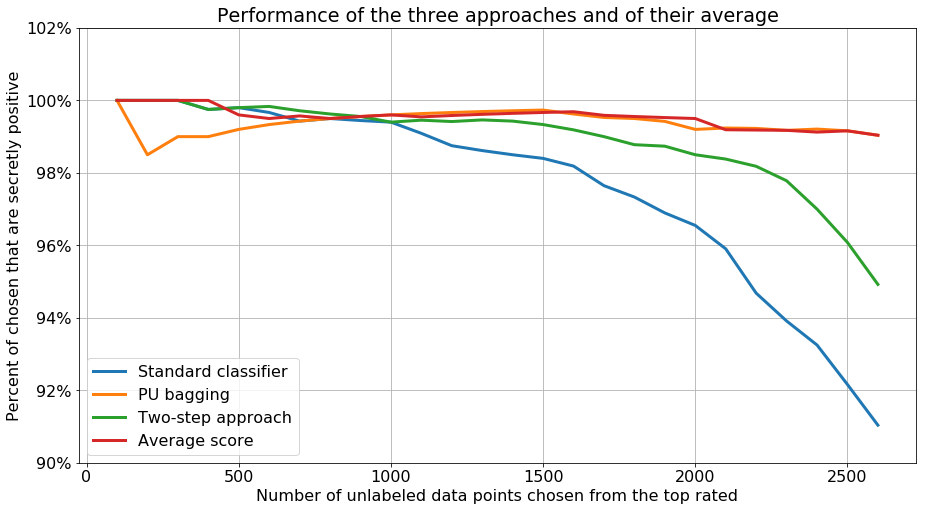

In [19]:
# Performance graphing
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 15, 8

plt.plot(
    ts, y_std,
    ts, y_bag,
    ts, y_stp,
    ts, y_all,
    lw = 3
)

vals = plt.gca().get_yticks()
plt.yticks(vals, ['%.0f%%' % (v*100) for v in vals])
plt.xlabel('Number of unlabeled data points chosen from the top rated')
plt.ylabel('Percent of chosen that are secretly positive')
plt.legend([
    'Standard classifier', 
    'PU bagging', 
    'Two-step approach', 
    'Average score'
])
ylim = plt.gca().get_ylim()
plt.title('Performance of the three approaches and of their average')
plt.grid()
plt.show()